In [655]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [656]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')


In [657]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [658]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [659]:
def pie_chart(df, feature, output):
    survived = df[df[output] == 1][feature].value_counts()
    dead = df[df[output] == 0][feature].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    survived.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
    axes[0].set_title(f'Survived = 1')
    axes[0].set_ylabel('')

    dead.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Survived = 0')
    axes[1].set_ylabel('')

    fig.suptitle(f'Pie chart for {feature} data', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


In [660]:
def get_survived_counts(df, feature, output):
    survived_counts = df[df[output] == 1][feature].value_counts().to_dict()
    return survived_counts

## EDA

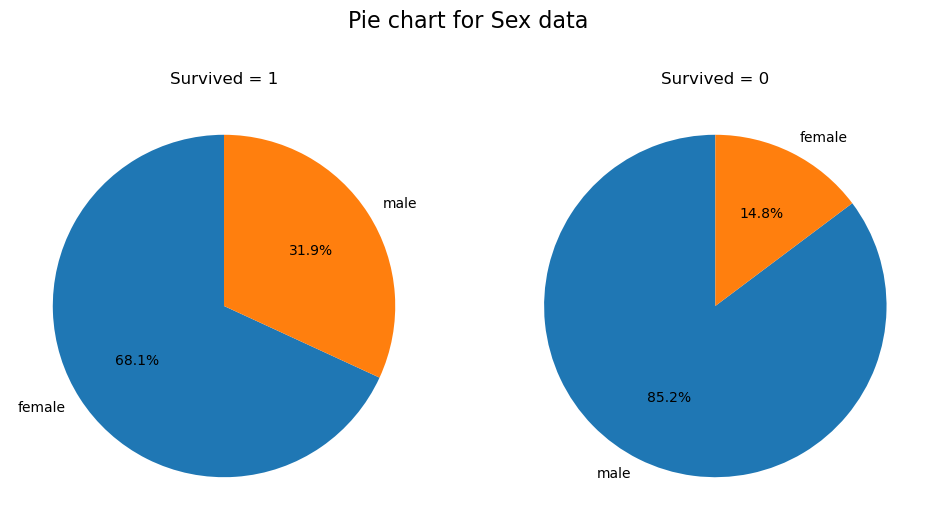

In [661]:
pie_chart(df=train_data, feature='Sex', output='Survived')

In [662]:
get_survived_counts(df=train_data, feature='Sex', output='Survived')

{'female': 233, 'male': 109}

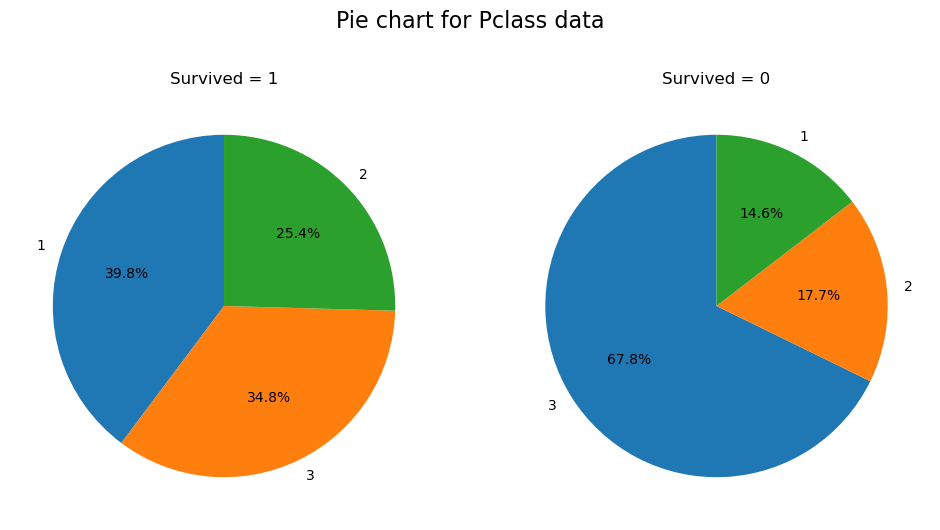

In [663]:
pie_chart(df=train_data, feature='Pclass', output='Survived')

In [664]:
get_survived_counts(df=train_data, feature='Pclass', output='Survived')

{1: 136, 3: 119, 2: 87}

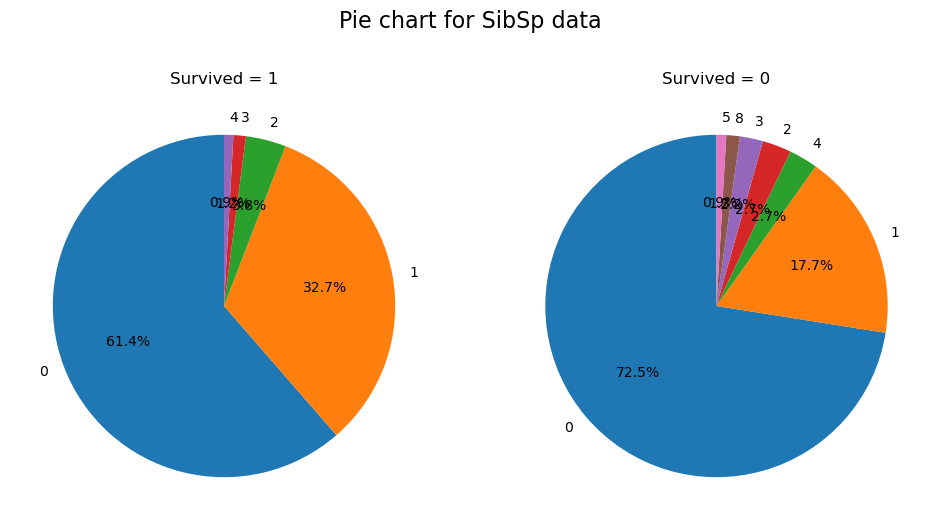

In [665]:
pie_chart(df=train_data, feature='SibSp', output='Survived')

In [666]:
get_survived_counts(df=train_data, feature='SibSp', output='Survived')

{0: 210, 1: 112, 2: 13, 3: 4, 4: 3}

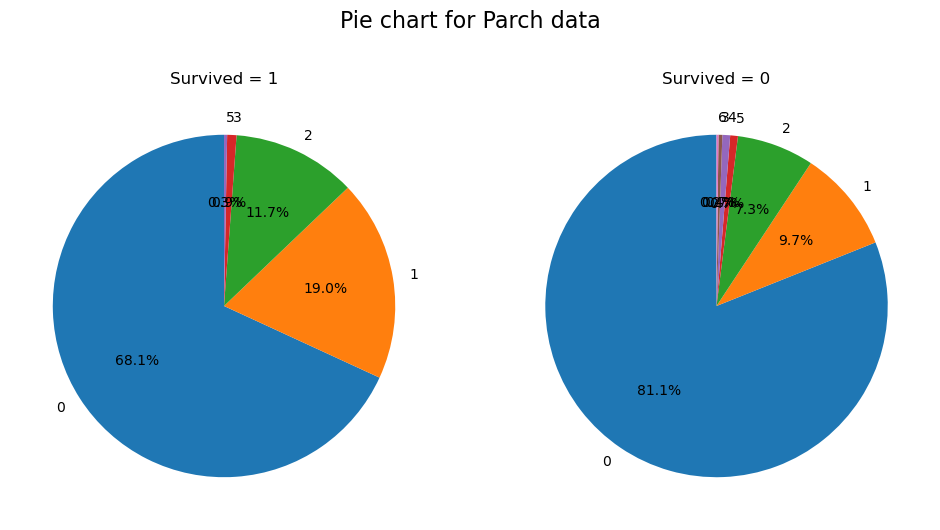

In [667]:
pie_chart(df=train_data, feature='Parch', output='Survived')

In [668]:
get_survived_counts(df=train_data, feature='Parch', output='Survived')

{0: 233, 1: 65, 2: 40, 3: 3, 5: 1}

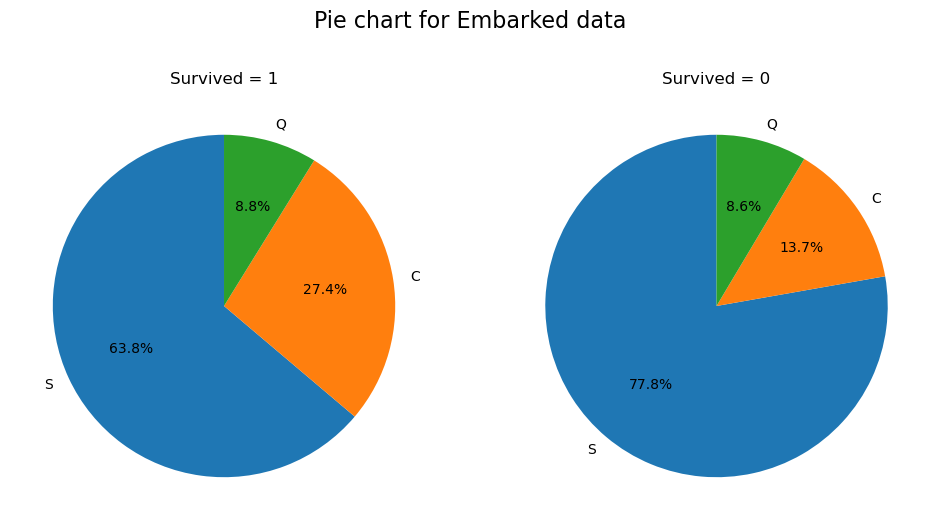

In [669]:
pie_chart(df=train_data, feature='Embarked', output='Survived')

In [670]:
get_survived_counts(df=train_data, feature='Embarked', output='Survived')

{'S': 217, 'C': 93, 'Q': 30}

## FE

In [671]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [672]:
train_data['Sex'].unique(), test_data['Sex'].unique()

(array(['male', 'female'], dtype=object),
 array(['male', 'female'], dtype=object))

In [673]:
gender_map ={'male':1, 'female':0}

In [674]:
train_data['Sex'] = train_data['Sex'].map(gender_map)
test_data['Sex'] = test_data['Sex'].map(gender_map)

In [675]:
train_data['Embarked'].isnull().sum(), test_data['Embarked'].isnull().sum()

(2, 0)

In [676]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [677]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [678]:
train_data['Embarked'].unique(), test_data['Embarked'].unique()

(array(['S', 'C', 'Q'], dtype=object), array(['Q', 'S', 'C'], dtype=object))

In [679]:
embarked_map = {'S':1, 'C':2, 'Q':3}

In [680]:
train_data['Embarked'] = train_data['Embarked'].map(embarked_map)
test_data['Embarked'] = test_data['Embarked'].map(embarked_map)

In [681]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [682]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [683]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [684]:
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [685]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [686]:
title_map = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Don':5, 'Rev':5, 'Dr':5, 'Mme':5, 'Ms':5,
       'Major':5, 'Lady':5, 'Sir':5, 'Mlle':5, 'Col':5, 'Capt':5, 'Countess':5,
       'Jonkheer':5}

In [687]:
train_data['Title'] = train_data['Title'].map(title_map)
test_data['Title'] = test_data['Title'].map(title_map)

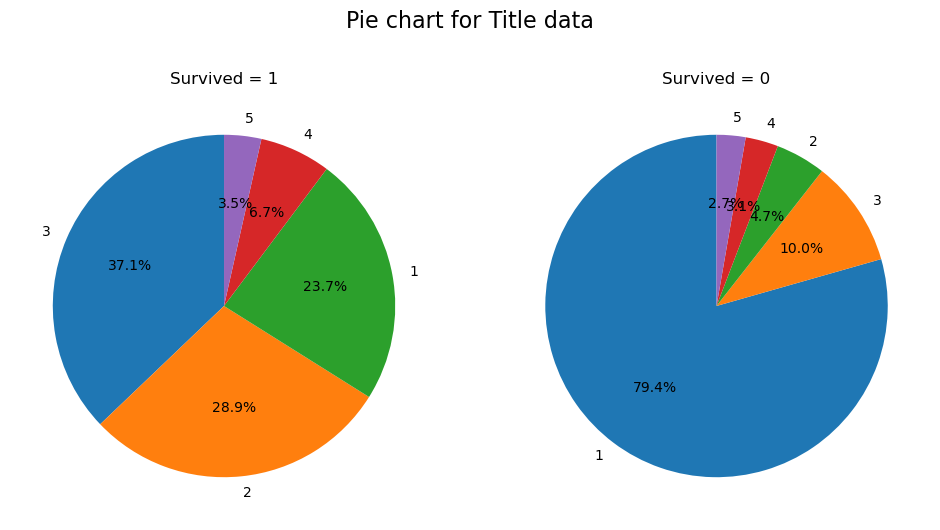

In [688]:
pie_chart(df=train_data, feature='Title', output='Survived')

In [689]:
get_survived_counts(df=train_data, feature='Title', output='Survived')

{3: 127, 2: 99, 1: 81, 4: 23, 5: 12}

In [690]:
train_age_mean = train_data.groupby('Title')['Age'].transform('mean')
train_data['Age'] = train_data['Age'].fillna(train_age_mean)

test_age_mean = test_data.groupby('Title')['Age'].transform('mean')
test_data['Age'] = test_data['Age'].fillna(test_age_mean)

train_data['Age'].isnull().sum(), test_data['Age'].isnull().sum()


(0, 0)

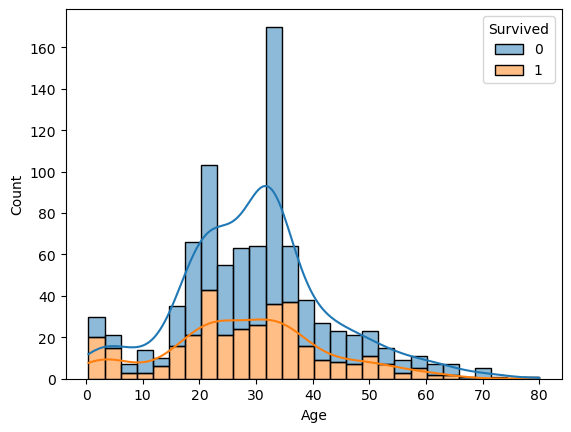

In [691]:
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, multiple='stack')
plt.show()


In [692]:
# For train_data
train_data.loc[train_data['Age'] <= 5, 'Age'] = 0
train_data.loc[(train_data['Age'] > 5) & (train_data['Age'] <= 18), 'Age'] = 1
train_data.loc[(train_data['Age'] > 18) & (train_data['Age'] <= 30), 'Age'] = 2
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 40), 'Age'] = 3
train_data.loc[(train_data['Age'] > 40) & (train_data['Age'] <= 60), 'Age'] = 4
train_data.loc[train_data['Age'] > 60, 'Age'] = 5

# For test_data
test_data.loc[test_data['Age'] <= 5, 'Age'] = 0
test_data.loc[(test_data['Age'] > 5) & (test_data['Age'] <= 18), 'Age'] = 1
test_data.loc[(test_data['Age'] > 18) & (test_data['Age'] <= 30), 'Age'] = 2
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 40), 'Age'] = 3
test_data.loc[(test_data['Age'] > 40) & (test_data['Age'] <= 60), 'Age'] = 4
test_data.loc[test_data['Age'] > 60, 'Age'] = 5



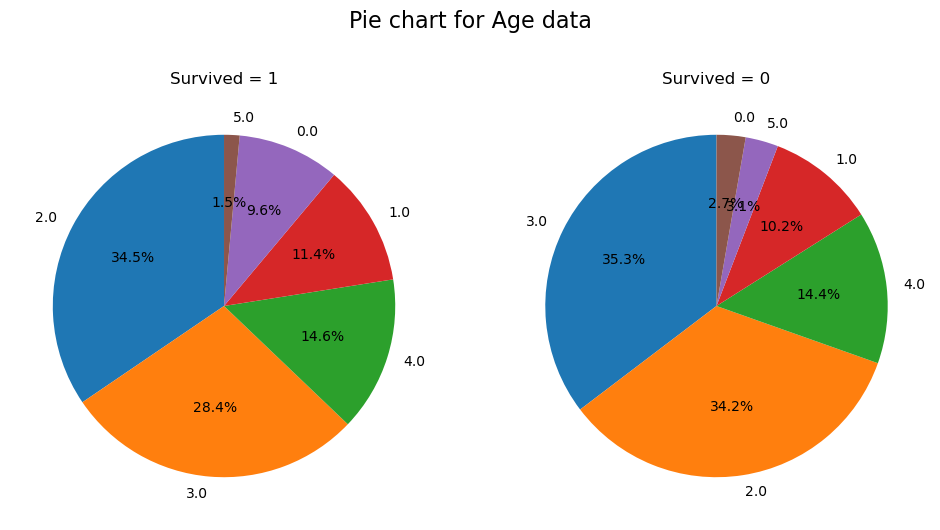

In [693]:
pie_chart(df=train_data, feature='Age', output='Survived')

In [694]:
get_survived_counts(df=train_data, feature='Age', output='Survived')

{2.0: 118, 3.0: 97, 4.0: 50, 1.0: 39, 0.0: 33, 5.0: 5}

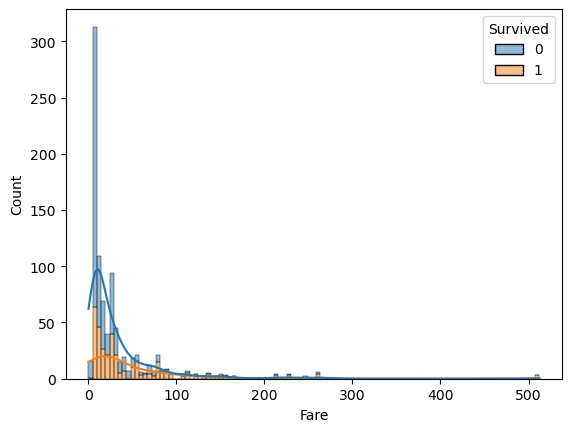

In [695]:
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.show()


In [696]:
Q1 = train_data['Fare'].quantile(0.25)
Q3 = train_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [697]:
train_data['Fare'] = np.log1p(train_data['Fare'])


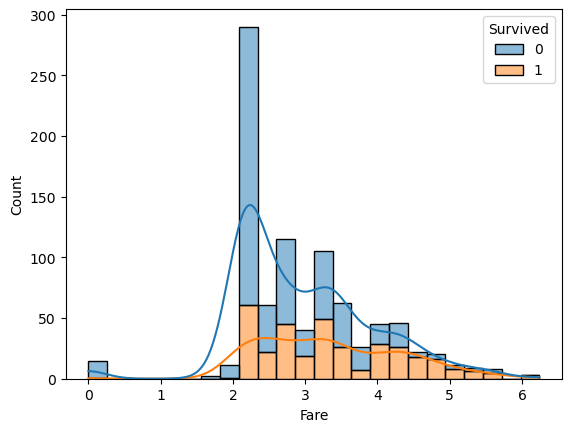

In [698]:
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.show()


In [699]:
# For train_data
train_data.loc[train_data['Fare'] <= 1.5, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 1.5) & (train_data['Fare'] <= 2.75), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 2.75) & (train_data['Fare'] <= 4), 'Fare'] = 2
train_data.loc[train_data['Fare'] > 4, 'Fare'] = 3

# For test_data
test_data.loc[test_data['Fare'] <= 1.5, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 1.5) & (test_data['Fare'] <= 2.75), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 2.75) & (test_data['Fare'] <= 4), 'Fare'] = 2
test_data.loc[test_data['Fare'] > 4, 'Fare'] = 3


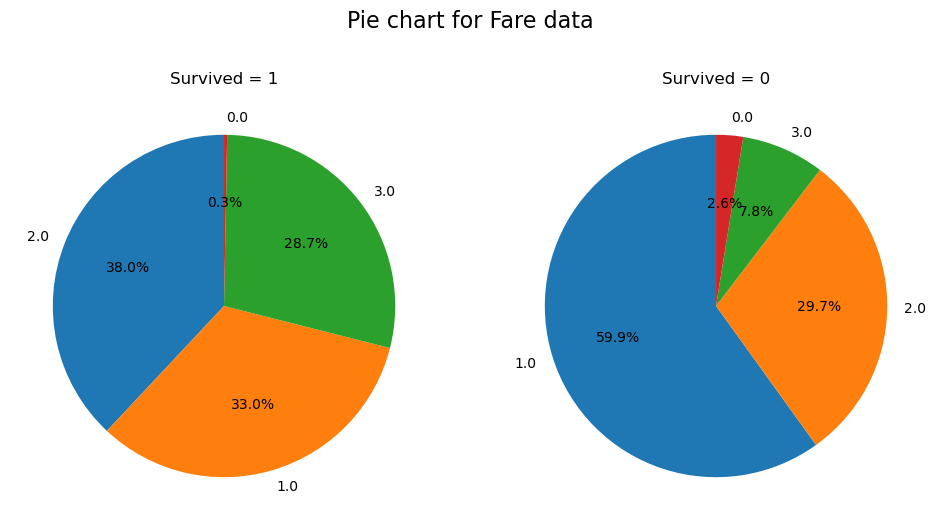

In [700]:
pie_chart(df=train_data, feature='Fare', output='Survived')

In [701]:
get_survived_counts(df=train_data, feature='Fare', output='Survived')

{2.0: 130, 1.0: 113, 3.0: 98, 0.0: 1}

In [702]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,1.0,NaN,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,3.0,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,1.0,NaN,1,3


In [703]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [704]:
train_data['TotalFamilyMembers'] = train_data['Parch'] + train_data['SibSp']
test_data['TotalFamilyMembers'] = test_data['Parch'] + test_data['SibSp']

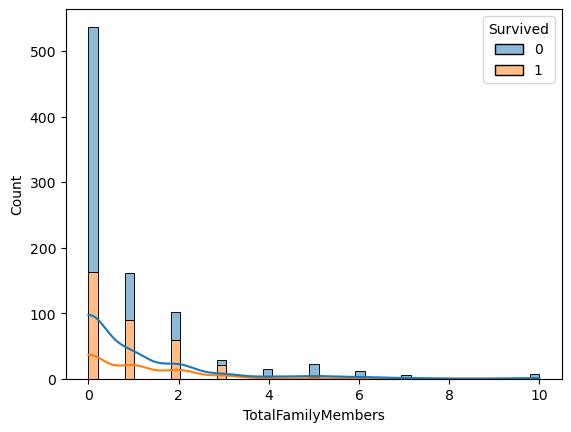

In [705]:
sns.histplot(data=train_data, x='TotalFamilyMembers', hue='Survived', kde=True, multiple='stack')
plt.show()


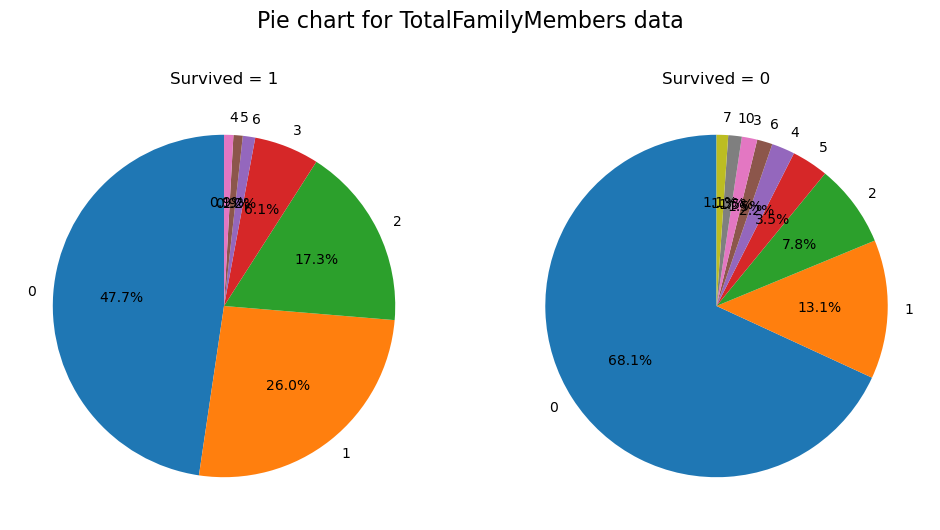

In [706]:
pie_chart(df=train_data, feature='TotalFamilyMembers', output='Survived')

In [707]:
get_survived_counts(df=train_data, feature='TotalFamilyMembers', output='Survived')

{0: 163, 1: 89, 2: 59, 3: 21, 6: 4, 5: 3, 4: 3}

In [708]:
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]

train_data['Cabin'].unique(), test_data['Cabin'].unique()

(array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [709]:
cabin_map = {'C':2, 'E':4, 'G':6, 'D':3, 'A':0, 'B':1, 'F':5, 'T':7}

In [710]:
train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)

In [711]:

train_data['Cabin'].fillna(train_data.groupby(['Pclass'])['Cabin'].transform('median'), inplace=True)

test_data['Cabin'].fillna(test_data.groupby(['Pclass'])['Cabin'].transform('median'), inplace=True)


C:\Users\Durjay\AppData\Local\Temp\ipykernel_12536\1260726222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna(train_data.groupby(['Pclass'])['Cabin'].transform('median'), inplace=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_12536\1260726222.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [712]:
train_data['Cabin'].isnull().sum(), test_data['Cabin'].isnull().sum()

(0, 0)

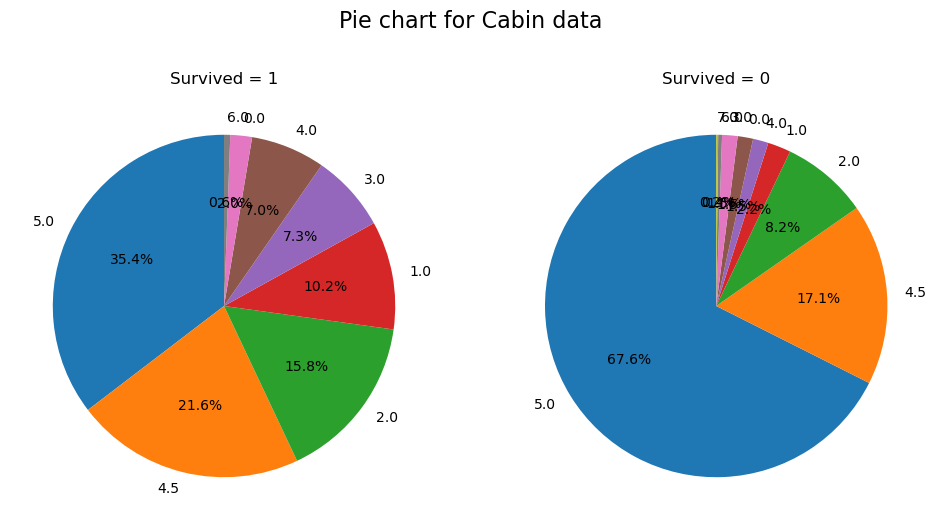

In [713]:
pie_chart(df=train_data, feature='Cabin', output='Survived')

In [714]:
get_survived_counts(df=train_data, feature='Cabin', output='Survived')

{5.0: 121, 4.5: 74, 2.0: 54, 1.0: 35, 3.0: 25, 4.0: 24, 0.0: 7, 6.0: 2}

In [715]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TotalFamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,1.0,5.0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,3.0,2.0,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,1.0,5.0,1,3,0


In [716]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TotalFamilyMembers
0,892,3,"Kelly, Mr. James",1,3.0,0,0,330911,3.0,5.0,3,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,4.0,1,0,363272,3.0,5.0,1,2.0,1
2,894,2,"Myles, Mr. Thomas Francis",1,5.0,0,0,240276,3.0,5.0,3,1.0,0


In [717]:
train_data.drop(columns=['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], inplace=True)
test_data.drop(columns=['Name', 'Ticket','PassengerId', 'SibSp', 'Parch'], inplace=True)

In [718]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Sex                 891 non-null    int64  
 3   Age                 891 non-null    float64
 4   Fare                891 non-null    float64
 5   Cabin               891 non-null    float64
 6   Embarked            891 non-null    int64  
 7   Title               891 non-null    int64  
 8   TotalFamilyMembers  891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [719]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Sex                 418 non-null    int64  
 2   Age                 418 non-null    float64
 3   Fare                417 non-null    float64
 4   Cabin               418 non-null    float64
 5   Embarked            418 non-null    int64  
 6   Title               417 non-null    float64
 7   TotalFamilyMembers  418 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.3 KB


In [720]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Title'].fillna(1, inplace=True)

C:\Users\Durjay\AppData\Local\Temp\ipykernel_12536\1680874162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_12536\1680874162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [721]:
y_train = train_data['Survived']
x_train = train_data.drop(columns='Survived')

x_test = test_data
y_test = submission_data['Survived']

In [722]:
x_train.shape, y_train.shape

((891, 8), (891,))

In [723]:
x_test.shape, y_test.shape

((418, 8), (418,))

In [724]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [725]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100

(82.05741626794259, 80.8080808080808)

In [726]:
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train,y_train)
    print(dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100, i)

93.54066985645933 78.22671156004489 1
93.0622009569378 81.70594837261504 2
90.66985645933015 82.49158249158249 3
52.63157894736842 83.72615039281706 4
45.21531100478469 84.73625140291807 5
63.1578947368421 85.74635241301908 6
67.70334928229666 87.42985409652077 7
65.78947368421053 88.7766554433221 8
66.98564593301435 89.22558922558923 9
66.02870813397129 89.56228956228956 10
65.55023923444976 89.56228956228956 11
63.8755980861244 89.8989898989899 12
64.83253588516746 90.12345679012346 13
69.377990430622 90.23569023569024 14
70.09569377990431 90.34792368125702 15
63.397129186602875 90.34792368125702 16
63.8755980861244 90.34792368125702 17
70.33492822966507 90.34792368125702 18
63.397129186602875 90.34792368125702 19


In [727]:
sv = SVC(kernel='linear')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(100.0, 78.67564534231201)

In [728]:
sv = SVC(kernel='poly')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(94.49760765550239, 83.05274971941638)

In [729]:
sv = SVC(kernel='rbf')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(94.01913875598086, 83.27721661054994)

In [730]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn.score(x_test, y_test)*100, knn.score(x_train, y_train)*100

(77.75119617224881, 85.6341189674523)

In [731]:
gb = GaussianNB()
gb.fit(x_train, y_train)

gb.score(x_test, y_test)*100, gb.score(x_train, y_train)*100

(81.81818181818183, 77.32884399551067)

### Hyper Tuning

In [732]:
from sklearn.model_selection import GridSearchCV

In [733]:
df= {'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [i for i in range(2,20)]}

In [734]:
gd = GridSearchCV(DecisionTreeClassifier(), param_grid=df, cv=5)
gd.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [735]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [736]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best')
dt.fit(x_train,y_train)

dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(91.86602870813397, 82.82828282828282)

In [737]:
output = submission_data.copy()

output['Survived'] = dt.predict(x_test)

correct_predictions = (output['Survived'] == submission_data['Survived']).sum()

accuracy = correct_predictions / len(submission_data) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 91.87%


In [738]:

output.to_csv('submission.csv', index=False)


#### Since this model was Under fitted, fixing the Underfitting

In [739]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(57.655502392344495, 84.73625140291807)

In [740]:
output = submission_data.copy()

output['Survived'] = dt.predict(x_test)

correct_predictions = (output['Survived'] == submission_data['Survived']).sum()

accuracy = correct_predictions / len(submission_data) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 57.66%
